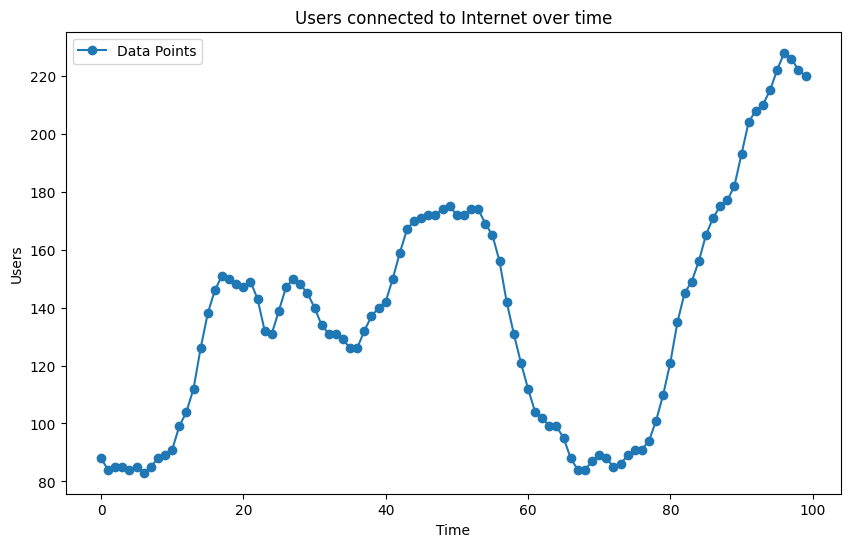

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller


data = pd.read_csv("/content/data.csv")


wwwusage = data['x']


wwwusage = wwwusage.iloc[:100]


plt.figure(figsize=(10, 6))
plt.plot(wwwusage, marker='o', linestyle='-', label='Data Points')
plt.title('Users connected to Internet over time')
plt.xlabel('Time')
plt.ylabel('Users')
plt.legend()
plt.show()


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import aic, bic
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf


In [20]:
print(wwwusage)

0      88
1      84
2      85
3      85
4      84
     ... 
95    222
96    228
97    226
98    222
99    220
Name: x, Length: 100, dtype: int64


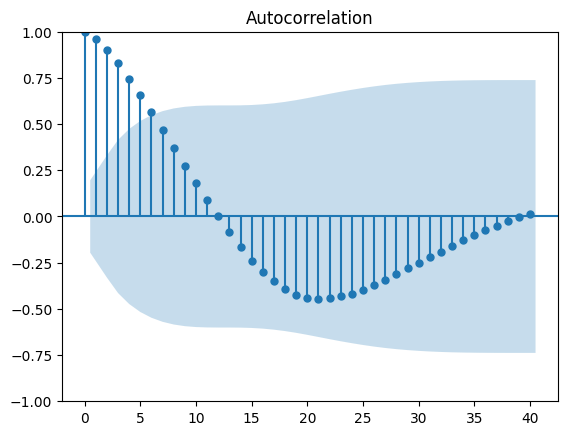

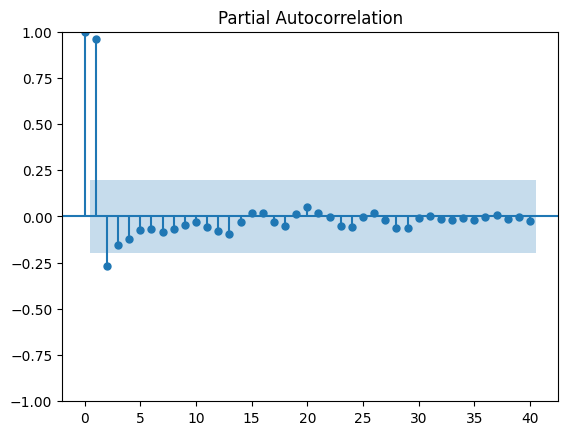

In [21]:
plot_acf(data, lags=40)
plt.show()

plot_pacf(data, lags=40)
plt.show()


In [22]:
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')

adf_test(data)

ADF Statistic: -2.4642397172033674
p-value: 0.12441935447109487
Critical Values:
   1%: -3.5003788874873405
   5%: -2.8921519665075235
   10%: -2.5830997960069446


In [23]:
z1 = np.diff(wwwusage)


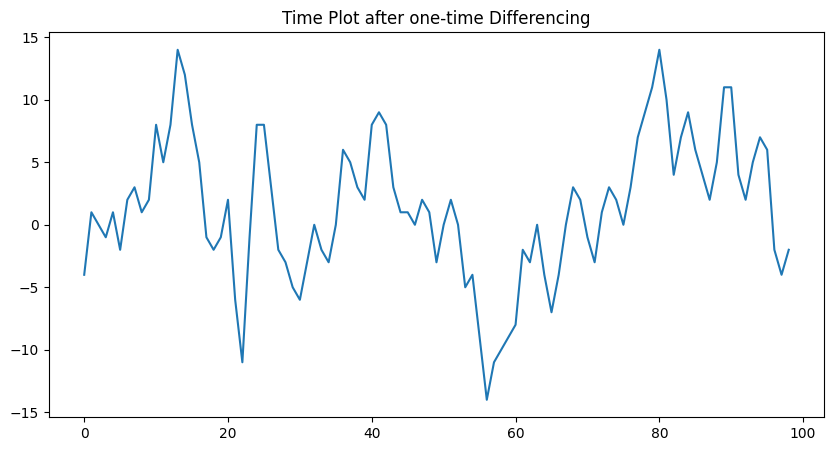

In [24]:
plt.figure(figsize=(10, 5))
plt.plot(z1)
plt.title("Time Plot after one-time Differencing")
plt.show()

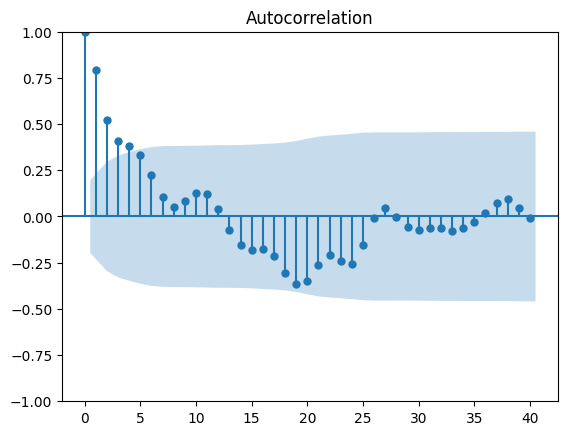

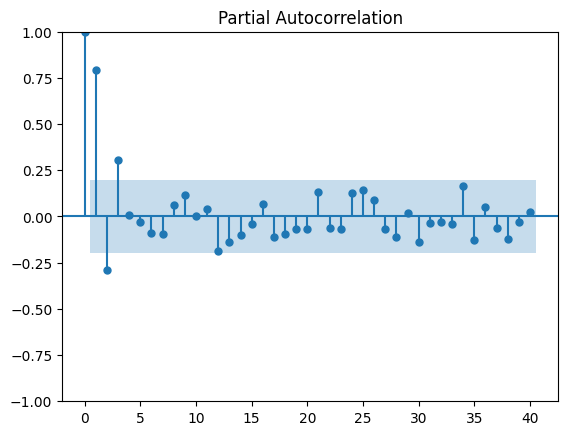

In [25]:
plot_acf(z1, lags=40)
plt.show()

plot_pacf(z1, lags=40)
plt.show()

In [29]:
model_310 = ARIMA(wwwusage, order=(3, 1, 0))
fit_310 = model_310.fit()
print(fit_310.summary())


                               SARIMAX Results                                
Dep. Variable:                      x   No. Observations:                  100
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -251.997
Date:                Thu, 14 Mar 2024   AIC                            511.995
Time:                        15:42:32   BIC                            522.375
Sample:                             0   HQIC                           516.195
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1513      0.103     11.214      0.000       0.950       1.353
ar.L2         -0.6612      0.134     -4.932      0.000      -0.924      -0.398
ar.L3          0.3407      0.094      3.641      0.0

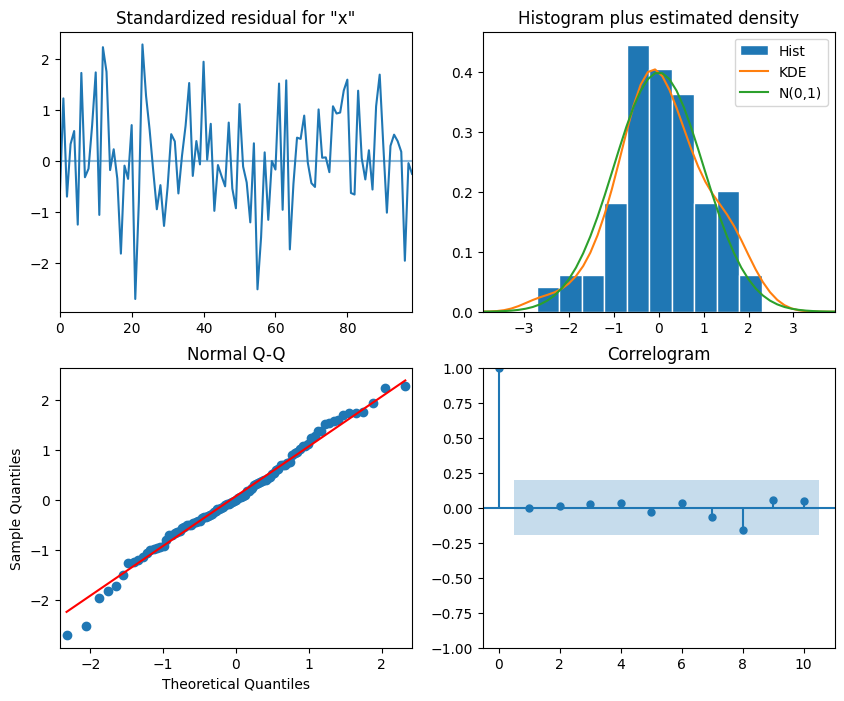

In [31]:
fit_310.plot_diagnostics(figsize=(10, 8))
plt.show()


In [32]:
print("AIC:", fit_310.aic)
print("BIC:", fit_310.bic)

AIC: 511.99481588788706
BIC: 522.3752952884254


In [33]:
forecast_310 = fit_310.forecast(steps=20)

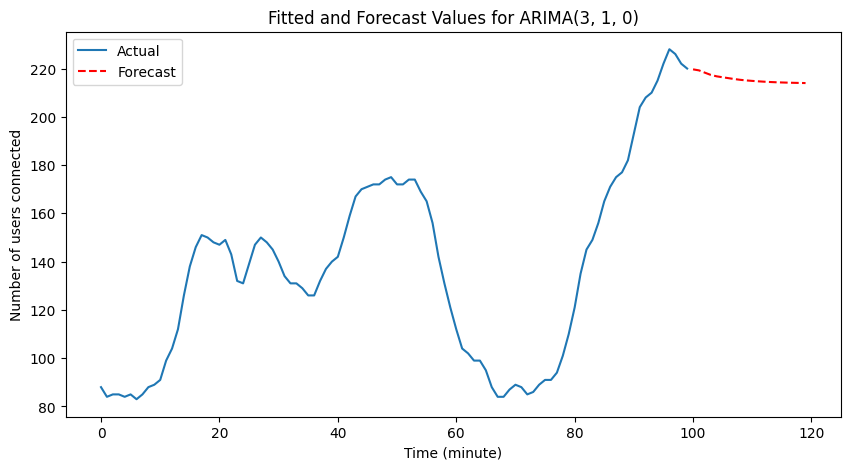

In [34]:
plt.figure(figsize=(10, 5))
plt.plot(wwwusage, label='Actual')
plt.plot(np.arange(100, 120), forecast_310, label='Forecast', linestyle='--', color='red')
plt.title("Fitted and Forecast Values for ARIMA(3, 1, 0)")
plt.xlabel("Time (minute)")
plt.ylabel("Number of users connected")
plt.legend()
plt.show()

In [35]:
model_111 = ARIMA(wwwusage, order=(1, 1, 1))
fit_111 = model_111.fit()
print(fit_111.summary())


                               SARIMAX Results                                
Dep. Variable:                      x   No. Observations:                  100
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -254.150
Date:                Thu, 14 Mar 2024   AIC                            514.300
Time:                        15:43:03   BIC                            522.086
Sample:                             0   HQIC                           517.450
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6504      0.090      7.258      0.000       0.475       0.826
ma.L1          0.5256      0.088      5.994      0.000       0.354       0.697
sigma2         9.7934      1.405      6.970      0.0

In [36]:
print("AIC:", fit_111.aic)
print("BIC:", fit_111.bic)

AIC: 514.3002541088953
BIC: 522.085613659299


In [37]:
forecast_111 = fit_111.forecast(steps=20)

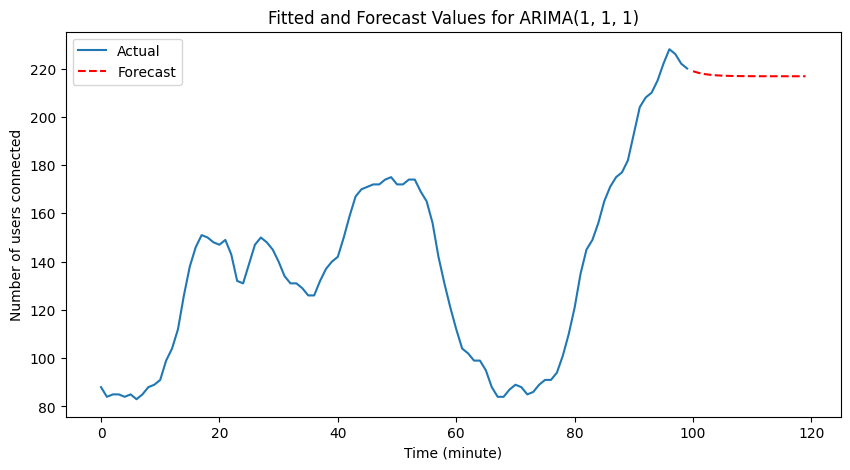

In [38]:
plt.figure(figsize=(10, 5))
plt.plot(wwwusage, label='Actual')
plt.plot(np.arange(100, 120), forecast_111, label='Forecast', linestyle='--', color='red')
plt.title("Fitted and Forecast Values for ARIMA(1, 1, 1)")
plt.xlabel("Time (minute)")
plt.ylabel("Number of users connected")
plt.legend()
plt.show()


In [39]:
z2 = np.diff(z1)

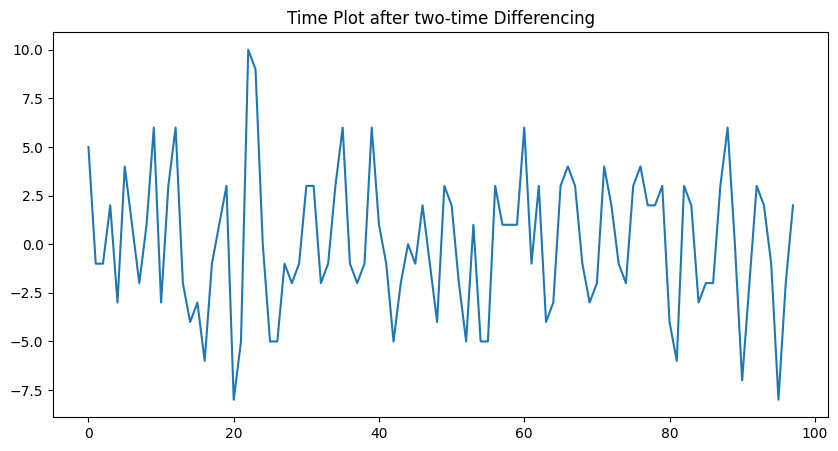

In [40]:
plt.figure(figsize=(10, 5))
plt.plot(z2)
plt.title("Time Plot after two-time Differencing")
plt.show()

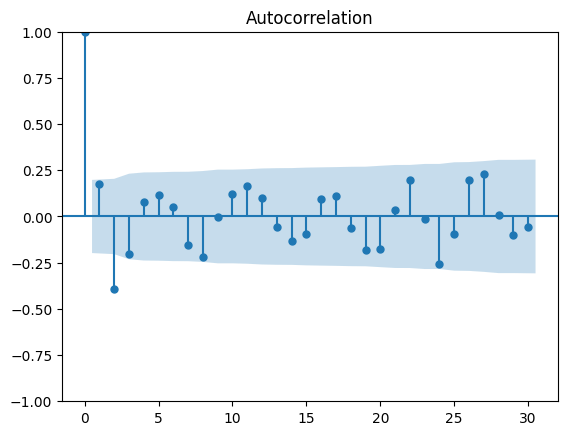

In [41]:
plot_acf(z2, lags=30)
plt.show()

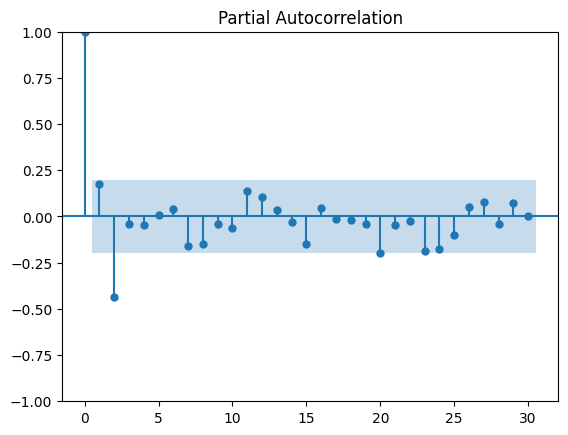

In [42]:
plot_pacf(z2, lags=30)
plt.show()

In [43]:
model_220 = ARIMA(wwwusage, order=(2, 2, 0))
fit_220 = model_220.fit()
print(fit_220.summary())

                               SARIMAX Results                                
Dep. Variable:                      x   No. Observations:                  100
Model:                 ARIMA(2, 2, 0)   Log Likelihood                -252.732
Date:                Thu, 14 Mar 2024   AIC                            511.465
Time:                        15:43:27   BIC                            519.220
Sample:                             0   HQIC                           514.601
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2579      0.103      2.510      0.012       0.056       0.459
ar.L2         -0.4407      0.087     -5.093      0.000      -0.610      -0.271
sigma2        10.1268      1.519      6.668      0.0

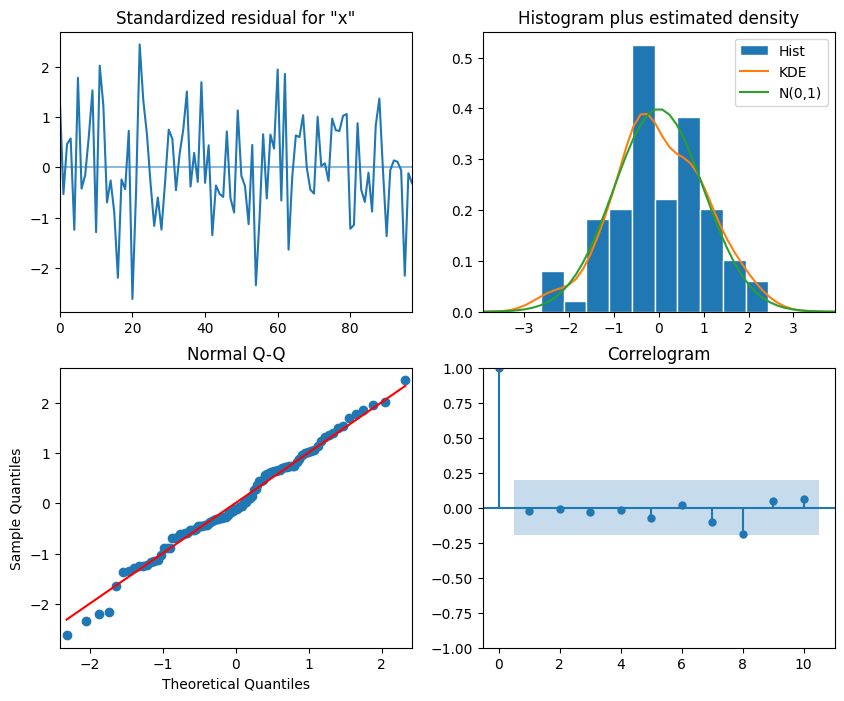

In [44]:
fit_220.plot_diagnostics(figsize=(10, 8))
plt.show()

In [45]:
print("AIC:", fit_220.aic)
print("BIC:", fit_220.bic)

AIC: 511.46478338109455
BIC: 519.2196858171062


In [46]:
forecast_220 = fit_220.forecast(steps=20)

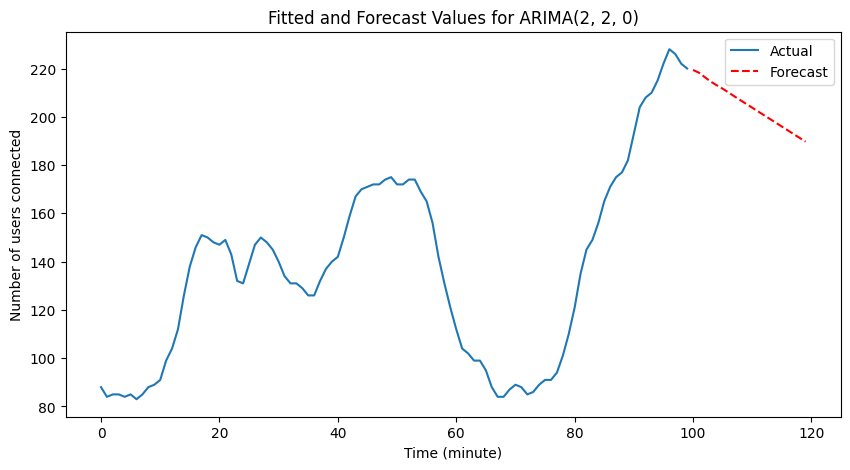

In [47]:
plt.figure(figsize=(10, 5))
plt.plot(wwwusage, label='Actual')
plt.plot(np.arange(100, 120), forecast_220, label='Forecast', linestyle='--', color='red')
plt.title("Fitted and Forecast Values for ARIMA(2, 2, 0)")
plt.xlabel("Time (minute)")
plt.ylabel("Number of users connected")
plt.legend()
plt.show()

In [48]:
model_525 = ARIMA(wwwusage, order=(5, 2, 5))
fit_525 = model_525.fit()
print(fit_525.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:                      x   No. Observations:                  100
Model:                 ARIMA(5, 2, 5)   Log Likelihood                -246.941
Date:                Thu, 14 Mar 2024   AIC                            515.882
Time:                        15:43:44   BIC                            544.316
Sample:                             0   HQIC                           527.383
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2539      0.233      5.376      0.000       0.797       1.711
ar.L2         -0.6621      0.458     -1.445      0.148      -1.560       0.236
ar.L3          0.0630      0.509      0.124      0.9

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


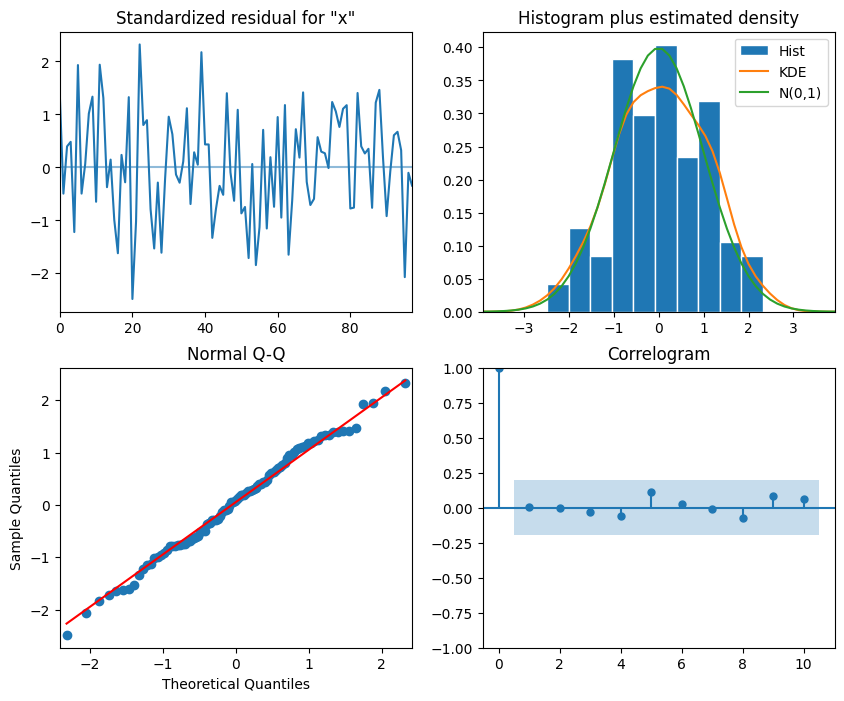

In [49]:
fit_525.plot_diagnostics(figsize=(10, 8))
plt.show()

In [50]:
print("AIC:", fit_525.aic)
print("BIC:", fit_525.bic)

AIC: 515.8817587368899
BIC: 544.3164010022663


In [51]:
forecast_525 = fit_525.forecast(steps=20)


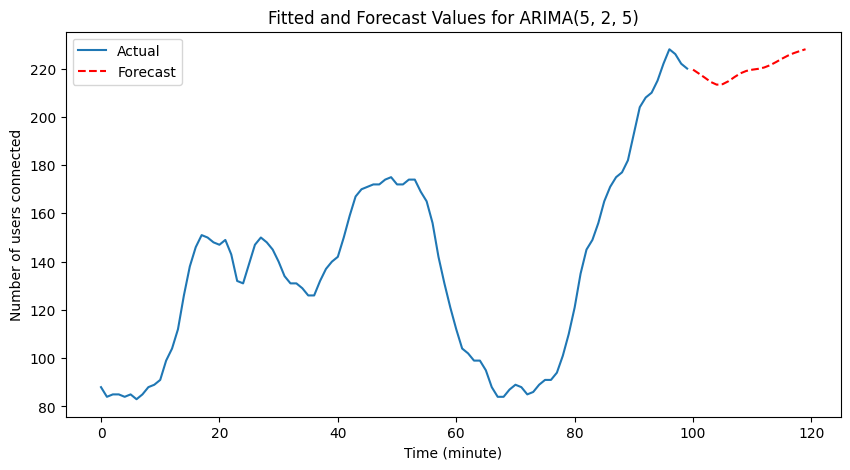

In [52]:
plt.figure(figsize=(10, 5))
plt.plot(wwwusage, label='Actual')
plt.plot(np.arange(100, 120), forecast_525, label='Forecast', linestyle='--', color='red')
plt.title("Fitted and Forecast Values for ARIMA(5, 2, 5)")
plt.xlabel("Time (minute)")
plt.ylabel("Number of users connected")
plt.legend()
plt.show()

In [53]:
print("Model Comparison - AIC and BIC:")
print("ARIMA(3, 1, 0): AIC =", fit_310.aic, ", BIC =", fit_310.bic)
print("ARIMA(1, 1, 1): AIC =", fit_111.aic, ", BIC =", fit_111.bic)
print("ARIMA(2, 2, 0): AIC =", fit_220.aic, ", BIC =", fit_220.bic)
print("ARIMA(5, 2, 5): AIC =", fit_525.aic, ", BIC =", fit_525.bic)

Model Comparison - AIC and BIC:
ARIMA(3, 1, 0): AIC = 511.99481588788706 , BIC = 522.3752952884254
ARIMA(1, 1, 1): AIC = 514.3002541088953 , BIC = 522.085613659299
ARIMA(2, 2, 0): AIC = 511.46478338109455 , BIC = 519.2196858171062
ARIMA(5, 2, 5): AIC = 515.8817587368899 , BIC = 544.3164010022663


In [56]:
!pip install pmdarima


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=531.096, Time=0.56 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1277.994, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=534.894, Time=0.55 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=529.183, Time=0.71 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=564.832, Time=0.45 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.45 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.51 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.96 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=532.642, Time=0.99 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=526.492, Time=0.45 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=564.487, Time=0.56 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=538.940, Time=0.27 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=528.287, Time=0.89 sec
 

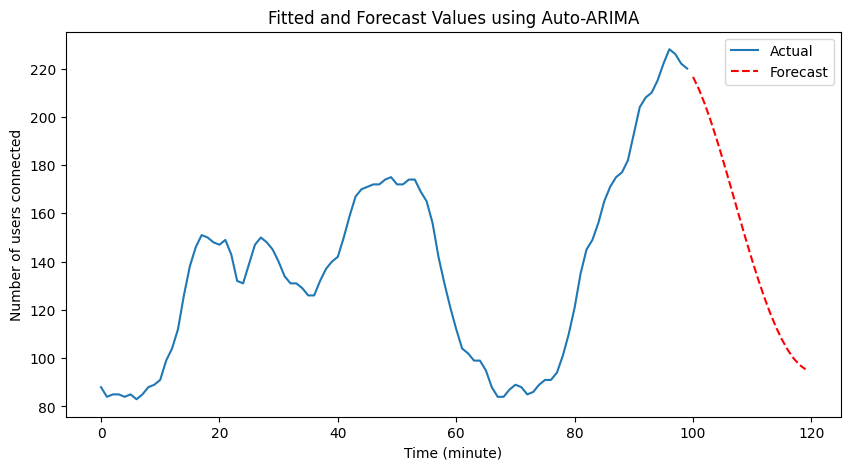

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima

# Load the data
data = pd.read_csv("/content/data.csv")

# Using 'x' column for wwwusage
wwwusage = data['x']

# Considering the first 100 observations
wwwusage = wwwusage.iloc[:100]

# Fit auto_arima
model = auto_arima(wwwusage, seasonal=False, trace=True)

# Print model summary
print(model.summary())

# Forecasting
forecast = model.predict(n_periods=20)

# Plotting original data with forecast
plt.figure(figsize=(10, 5))
plt.plot(wwwusage, label='Actual')
plt.plot(range(len(wwwusage), len(wwwusage) + len(forecast)), forecast, label='Forecast', linestyle='--', color='red')
plt.title("Fitted and Forecast Values using Auto-ARIMA")
plt.xlabel("Time (minute)")
plt.ylabel("Number of users connected")
plt.legend()
plt.show()


In [58]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from itertools import product

# Load the data
data = pd.read_csv("/content/data.csv")

# Using 'x' column for wwwusage
wwwusage = data['x']

# Considering the first 100 observations
wwwusage = wwwusage.iloc[:100]

# Define ranges for p, d, q
p_values = range(0, 6)  # AR range
d_values = range(0, 3)  # Differencing range
q_values = range(0, 6)  # MA range

# Initialize variables to store best AIC, BIC, and corresponding model order
best_aic = float("inf")
best_bic = float("inf")
best_order = None

# Iterate over all combinations of p, d, q
for p, d, q in product(p_values, d_values, q_values):
    if p == 0 and d == 0 and q == 0:
        continue  # Skip (0, 0, 0) as it is not a valid ARIMA model
    try:
        # Fit the ARIMA model
        model = ARIMA(wwwusage, order=(p, d, q))
        fit = model.fit()

        # Get AIC and BIC
        aic = fit.aic
        bic = fit.bic

        # Check if current model has lower AIC or BIC
        if aic < best_aic:
            best_aic = aic
            best_bic = bic
            best_order = (p, d, q)

        if bic < best_bic:
            best_aic = aic
            best_bic = bic
            best_order = (p, d, q)

    except Exception as e:
        # Skip if model fitting fails
        print(f"Issue with model ({p}, {d}, {q}): {e}")
        continue

print("Best Model Order (p, d, q):", best_order)
print("Best AIC:", best_aic)
print("Best BIC:", best_bic)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: Us

Best Model Order (p, d, q): (3, 2, 1)
Best AIC: 510.71260389061206
Best BIC: 523.6374412839649


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      x   No. Observations:                  100
Model:                 ARIMA(3, 2, 1)   Log Likelihood                -250.356
Date:                Thu, 14 Mar 2024   AIC                            510.713
Time:                        15:46:03   BIC                            523.637
Sample:                             0   HQIC                           515.940
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1599      0.117      9.955      0.000       0.932       1.388
ar.L2         -0.6642      0.139     -4.762      0.000      -0.938      -0.391
ar.L3          0.3479      0.110      3.158      0.0

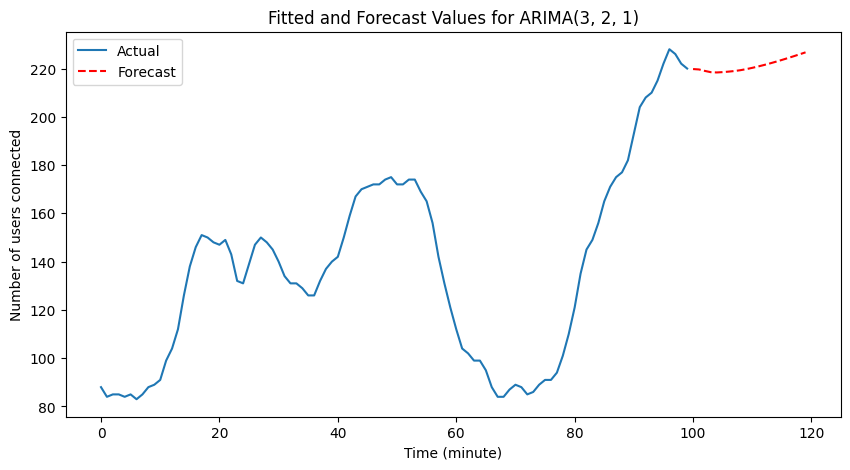

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


data = pd.read_csv("/content/data.csv")


wwwusage = data['x']


wwwusage = wwwusage.iloc[:100]

model_best = ARIMA(wwwusage, order=(3, 2, 1))
fit_best = model_best.fit()


print(fit_best.summary())


forecast_best = fit_best.forecast(steps=20)


plt.figure(figsize=(10, 5))
plt.plot(wwwusage, label='Actual')
plt.plot(np.arange(100, 120), forecast_best, label='Forecast', linestyle='--', color='red')
plt.title("Fitted and Forecast Values for ARIMA(3, 2, 1)")
plt.xlabel("Time (minute)")
plt.ylabel("Number of users connected")
plt.legend()
plt.show()


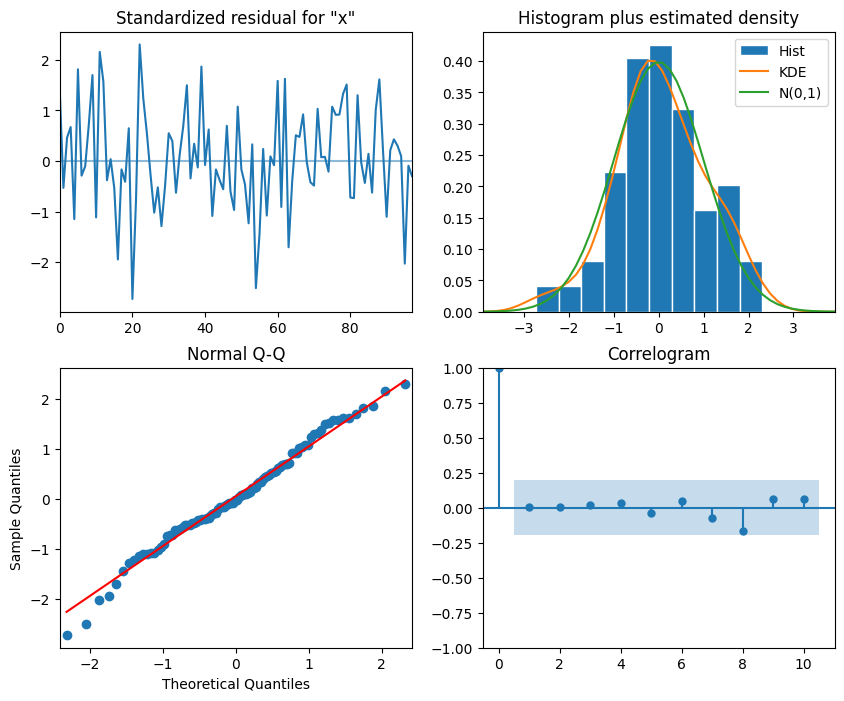

In [60]:

fit_best.plot_diagnostics(figsize=(10, 8))
plt.show()

In [66]:

rmse_310 = mean_squared_error(wwwusage[-20:], forecast_310, squared=False)
mae_310 = mean_absolute_error(wwwusage[-20:], forecast_310)


rmse_111 = mean_squared_error(wwwusage[-20:], forecast_111, squared=False)
mae_111 = mean_absolute_error(wwwusage[-20:], forecast_111)

rmse_220 = mean_squared_error(wwwusage[-20:], forecast_220, squared=False)
mae_220 = mean_absolute_error(wwwusage[-20:], forecast_220)

rmse_525 = mean_squared_error(wwwusage[-20:], forecast_525, squared=False)
mae_525 = mean_absolute_error(wwwusage[-20:], forecast_525)


rmse_321 = mean_squared_error(wwwusage[-20:], forecast_best, squared=False)
mae_321 = mean_absolute_error(wwwusage[-20:], forecast_best)

print("RMSE for ARIMA(3, 1, 0):", rmse_310)
print("MAE for ARIMA(3, 1, 0):", mae_310)
print("RMSE for ARIMA(2, 2, 0):", rmse_220)
print("MAE for ARIMA(2, 2, 0):", mae_220)
print("RMSE for ARIMA(5, 2, 5):", rmse_525)
print("MAE for ARIMA(5, 2, 5):", mae_525)
print("RMSE for ARIMA(3, 2, 1):", rmse_321)
print("MAE for ARIMA(3, 2, 1):", mae_321)

RMSE for ARIMA(3, 1, 0): 45.050100860343825
MAE for ARIMA(3, 1, 0): 34.27270749903598
RMSE for ARIMA(2, 2, 0): 45.22060405274124
MAE for ARIMA(2, 2, 0): 37.51449901956608
RMSE for ARIMA(5, 2, 5): 44.54242029860995
MAE for ARIMA(5, 2, 5): 33.98107360291739
RMSE for ARIMA(3, 2, 1): 46.31455127538858
MAE for ARIMA(3, 2, 1): 35.44351053002897
